# EDA exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('out.csv')

## Посмотрим что имеется в данном dataset

In [3]:
data.head()

,Рейтинг,Оценки,Отзывы,Цена,Заголовок,Описание,URL,ISBN,Год издания,Автор,...,Длина книги,Производитель,Длина,В комплекте,Раскраска,Правда,Мысль,АСТ,Питание от батареек,Тип батареек
0,5.0,7,2,452,"Как зарабатывать на акциях: Анализируем рынок,...","Задача инвестора заключается в том, чтобы расп...",https://market.yandex.ru/product--kak-zarabaty...,9785961474534,"2022, 22",Хачатрян Артем,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,20,8,665,Манга Магическая битва. Книга 4. Начало повино...,Маги-заклинатели успешно отразили атаку прокля...,https://market.yandex.ru/product--manga-magich...,978-5-389-22085-0,2022,Акутами Г.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,3,1,324,"Как жить: Уроки стоицизма от Эпиктета, Сенеки ...",Описание книги Как жить: Уроки стоицизма от Эп...,https://market.yandex.ru/product--kak-zhit-uro...,978-5-00139-726-7,"2022, 22",Селларс Джон,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.7,20,7,302,"""Понедельник начинается в субботу""Стругацкий А...","Название товара: ""Понедельник начинается в суб...",https://market.yandex.ru/product--strugatskii-...,978-5-17-090334-4,"1965, 2015, 2019, 2021, 2022, 2023, 2 023","Стругацкий А.Н., Стругацкий Б.Н.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,0,454,"Книга Могила Бэтмена (от автора ""Трансметропол...",Раз в неделю в любую погоду Альфред Пенниуорт ...,https://market.yandex.ru/product--komiks-mogil...,9785389202030,"2021, 2022, 21",Эллис У.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 101 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Рейтинг                            float64
 1    Оценки                             int64  
 2    Отзывы                             int64  
 3    Цена                               int64  
 4    Заголовок                          object 
 5    Описание                           object 
 6    URL                                object 
 7    ISBN                               object 
 8    Год издания                        object 
 9    Автор                              object 
 10   Редактор                           object 
 11   Язык                               object 
 12   Направление литературы             object 
 13   Тираж                              object 
 14   Количество страниц                 float64
 15   Иллюстрации                        object 
 16   Пере

In [5]:
data.describe()

,Рейтинг,Оценки,Отзывы,Цена,Количество страниц,Количество листов,Номер выпуска,Год
count,1633.000000,1633.000000,1633.000000,1633.000000,1358.000000,4.00,3.000000,10.000000
mean,1.659829,2.636252,0.694427,1667.570729,290.603829,44.75,16.333333,2021.900000
std,2.312448,19.846036,4.957449,5177.884751,231.733286,65.50,23.965253,3.314949
min,0.000000,0.000000,0.000000,0.000000,1.000000,12.00,2.000000,2015.000000
25%,0.000000,0.000000,0.000000,489.000000,128.000000,12.00,2.500000,2020.000000
50%,0.000000,0.000000,0.000000,817.000000,264.000000,12.00,3.000000,2024.000000
75%,5.000000,1.000000,0.000000,1272.000000,399.000000,44.75,23.500000,2024.000000
max,5.000000,547.000000,149.000000,109320.000000,3792.000000,143.00,44.000000,2024.000000


# Проведем предварительлную чистку признаков с невысоким количеством заполненных значений

Удалим книги с отсутствующим или одинаковым ISBN

In [6]:
data = data.drop_duplicates(subset=["ISBN"])

In [7]:
data = data.reset_index(drop=True)
data.tail(5)

,Рейтинг,Оценки,Отзывы,Цена,Заголовок,Описание,URL,ISBN,Год издания,Автор,...,Длина книги,Производитель,Длина,В комплекте,Раскраска,Правда,Мысль,АСТ,Питание от батареек,Тип батареек
1099,5.0,3,0,451,Комикс Психушка Джокера: Двуликий – Дважды Дву...,Описание комикса Психушка Джокера: Двуликий - ...,https://market.yandex.ru/product--psikhushka-d...,9785389177109,2021,Хайн Д.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,5.0,1,1,311,Адские ныряльщики. Призраки (Смит Н. С.),Десять лет назад Ксавьер «Икс» Родригес покину...,https://market.yandex.ru/product--hell-divers-...,9785171366698,2021,Смит Н.С.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,0.0,0,0,546,"Мягкая книга EVA «Медвежонок», 12 стр.","Задумываетесь о том, как привить ребёнку любов...",https://market.yandex.ru/product--miagkaia-kni...,9785906943378,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,0.0,0,0,408,"Буква-ленд Картонная книга «Режим дня», 10 стр.",Картонная книга с яркими картинками познакомит...,https://market.yandex.ru/product--bukva-lend-k...,978-5-00124-684-8,2019,Сачкова Е.К.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,0.0,0,0,463,Царь-девица. Соловьев В. С.,Россия. 1682 год. Скончался молодой и болезнен...,https://market.yandex.ru/product--tsar-devitsa...,9785448426353,2021,Соловьев В. С.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option("display.max_rows" , None)


In [9]:
data.isna().sum()

Рейтинг                                 0
Оценки                                  0
Отзывы                                  0
Цена                                    0
Заголовок                               0
Описание                                0
URL                                     0
ISBN                                    1
Год издания                            73
Автор                                  78
Редактор                              958
Язык                                  320
Направление литературы                747
Тираж                                 389
Количество страниц                    109
Иллюстрации                           920
Переплет                              113
Бумага                                624
Издательство                            5
Тип графической книги                1029
Художник                              901
Серия                                 619
Формат                                440
Переводчик                        

In [10]:
data.shape

(1104, 101)

In [11]:
for c in data.columns:
    print(f'{c}: {data[c].isna().sum()/data.shape[0]*100:.2f}%') 

Рейтинг: 0.00%
Оценки: 0.00%
Отзывы: 0.00%
Цена: 0.00%
Заголовок: 0.00%
Описание: 0.00%
URL: 0.00%
ISBN: 0.09%
Год издания: 6.61%
Автор: 7.07%
Редактор: 86.78%
Язык: 28.99%
Направление литературы: 67.66%
Тираж: 35.24%
Количество страниц: 9.87%
Иллюстрации: 83.33%
Переплет: 10.24%
Бумага: 56.52%
Издательство: 0.45%
Тип графической книги: 93.21%
Художник: 81.61%
Серия: 56.07%
Формат: 39.86%
Переводчик: 82.25%
Направление науки: 94.93%
Направление: 67.66%
Вес: 59.42%
Темы обучения: 97.92%
Развиваемые навыки: 98.82%
Темы: 98.55%
Тип пособия: 92.30%
Предмет: 88.68%
Класс: 91.58%
Дополнительная упаковка: 99.64%
Направление психологии: 95.56%
Образовательная программа: 98.55%
Тематика: 96.20%
Религия: 98.91%
Премия: 98.91%
Изучаемый язык: 99.18%
Дополнительная информация: 89.76%
Комплект: 99.55%
Минимальный возраст: 98.37%
Подарочное издание: 99.28%
Вид экзамена: 99.28%
Материал страниц: 97.37%
Особенности: 97.46%
Высота: 99.91%
Высота книги: 99.91%
Линейка: 100.00%
Тип: 100.00%
Количество ли

### Построим heatmap отоьбражающий пропуски

<Axes: >

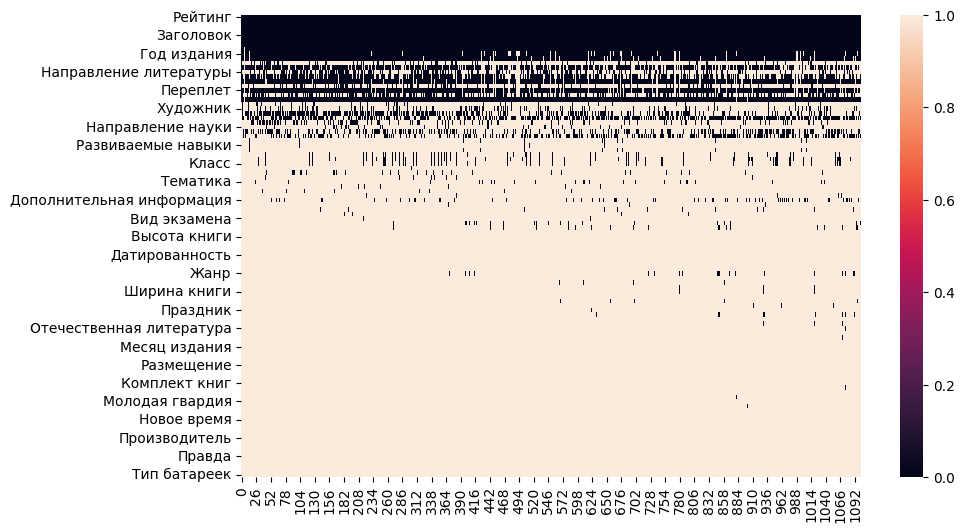

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose())

Удалим строки в которых не заполнен Автор. Так как это расскраски, плакаты и прочее

In [13]:
data.dropna(subset=['Автор'], axis=0, inplace=True)

Соберем список колонок, где пропусков > 70%

In [14]:
sapaces_70proc = [c for c in data.columns if data[c].isna().sum()/data.shape[0]*100 > 75.0 ]
print(sapaces_70proc)

['Редактор', 'Иллюстрации', 'Тип графической книги', 'Художник', 'Переводчик', 'Направление науки', 'Темы обучения', 'Развиваемые навыки', 'Темы', 'Тип пособия', 'Предмет', 'Класс', 'Дополнительная упаковка', 'Направление психологии', 'Образовательная программа', 'Тематика', 'Религия', 'Премия', 'Изучаемый язык', 'Дополнительная информация', 'Комплект', 'Минимальный возраст', 'Подарочное издание', 'Вид экзамена', 'Материал страниц', 'Особенности', 'Высота', 'Высота книги', 'Линейка', 'Тип', 'Количество листов', 'Датированность', 'Размер', 'Обложка', 'Крепление', 'Жанр', 'Минимальный рекомендуемый возраст', 'Бренд', 'Ширина', 'Ширина книги', 'Энциклопедия', 'Возраст', 'Тема', 'Праздник', 'Литература', 'Знание', 'Литературная форма', 'Отечественная литература', 'Радуга', 'Зарубежная литература', 'Журнал', 'Месяц издания', 'Номер выпуска', 'Периодичность', 'Язык издания', 'Размещение', 'Год', 'Тема изучения', 'Материал', 'Комплект книг', 'Сборник', 'Носитель', 'АСПОЛ', 'Молодая гвардия', 

Удалим те колонкт где в значениях признаках которых пропусков полее 75%

In [15]:
data.dropna(thresh=data.shape[0] // 4, axis = 1, inplace=True)
data.head()

,Рейтинг,Оценки,Отзывы,Цена,Заголовок,Описание,URL,ISBN,Год издания,Автор,...,Направление литературы,Тираж,Количество страниц,Переплет,Бумага,Издательство,Серия,Формат,Направление,Вес
0,5.0,7,2,452,"Как зарабатывать на акциях: Анализируем рынок,...","Задача инвестора заключается в том, чтобы расп...",https://market.yandex.ru/product--kak-zarabaty...,9785961474534,"2022, 22",Хачатрян Артем,...,"бизнес и финансы, Бизнес-литература",3000 шт.,212.0,твердый,офсетная,Альпина Паблишер,NaN,NaN,NaN,NaN
1,5.0,20,8,665,Манга Магическая битва. Книга 4. Начало повино...,Маги-заклинатели успешно отразили атаку прокля...,https://market.yandex.ru/product--manga-magich...,978-5-389-22085-0,2022,Акутами Г.,...,NaN,20000 шт.,384.0,твердый,офсетная,Азбука,Графические романы. Манга,19.5 x 13 x 2.5,NaN,NaN
2,5.0,3,1,324,"Как жить: Уроки стоицизма от Эпиктета, Сенеки ...",Описание книги Как жить: Уроки стоицизма от Эп...,https://market.yandex.ru/product--kak-zhit-uro...,978-5-00139-726-7,"2022, 22",Селларс Джон,...,научно-популярная литература,3000 шт.,90.0,твердый,NaN,Альпина нон-фикшн,NaN,NaN,NaN,NaN
3,4.7,20,7,302,"""Понедельник начинается в субботу""Стругацкий А...","Название товара: ""Понедельник начинается в суб...",https://market.yandex.ru/product--strugatskii-...,978-5-17-090334-4,"1965, 2015, 2019, 2021, 2022, 2023, 2 023","Стругацкий А.Н., Стругацкий Б.Н.",...,NaN,NaN,320.0,мягкий,NaN,"АСТ, Neoclassic",NaN,18 х 11.6 х 1.8,фантастика и фэнтези,220 г
4,5.0,1,0,454,"Книга Могила Бэтмена (от автора ""Трансметропол...",Раз в неделю в любую погоду Альфред Пенниуорт ...,https://market.yandex.ru/product--komiks-mogil...,9785389202030,"2021, 2022, 21",Эллис У.,...,NaN,4000 шт.,296.0,твердый,мелованная,Азбука,Графические романы. Бэтмен,26.8 x 17.5 x 1.8,NaN,NaN


Удали колонки, которые нам не нужны и данные в которых не структурированы

In [19]:
data.drop('Формат', axis=1, inplace=True)

In [20]:
data.drop('Вес', axis=1, inplace=True)

In [21]:
for c in data.columns:
    print(f'{c}: {data[c].isna().sum()/data.shape[0]*100:.2f}%') 

Рейтинг: 0.00%
Оценки: 0.00%
Отзывы: 0.00%
Цена: 0.00%
Заголовок: 0.00%
Описание: 0.00%
URL: 0.00%
ISBN: 0.00%
Год издания: 3.51%
Автор: 0.00%
Язык: 26.32%
Направление литературы: 66.86%
Тираж: 32.46%
Количество страниц: 6.92%
Переплет: 7.70%
Бумага: 54.97%
Издательство: 0.39%
Серия: 54.48%
Направление: 65.79%


In [22]:
data.dtypes

Рейтинг                   float64
Оценки                      int64
Отзывы                      int64
Цена                        int64
Заголовок                  object
Описание                   object
URL                        object
ISBN                       object
Год издания                object
Автор                      object
Язык                       object
Направление литературы     object
Тираж                      object
Количество страниц        float64
Переплет                   object
Бумага                     object
Издательство               object
Серия                      object
Направление                object
dtype: object

Присвоим типы данных для колонок

In [30]:
data.astype({'Количество страниц': 'int32'}).head(5)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [29]:
data.dtypes

Рейтинг                   float64
Оценки                      int64
Отзывы                      int64
Цена                        int64
Заголовок                  object
Описание                   object
URL                        object
ISBN                       object
Год издания                object
Автор                      object
Язык                       object
Направление литературы     object
Тираж                      object
Количество страниц        float64
Переплет                   object
Бумага                     object
Издательство               object
Серия                      object
Направление                object
dtype: object

Посмотрим, какие направления литературы присутствуют

In [23]:
janre = set(data['Направление'])
janre

{nan,
 'Зарубежная проза и поэзия',
 'Медицинская литература для специалистов',
 'Отечественная проза',
 'Отечественная проза, Художественная литература',
 'Словари и разговорники',
 'Учебная литература для школы',
 'Фантастическая литература',
 'Художественная литература',
 'аспирантам, студентам и абитуриентам',
 'детективы, триллеры, ужасы',
 'детективы, триллеры, ужасы, Отечественная проза',
 'детективы, триллеры, ужасы, Ужасы и триллеры, Художественная литература',
 'детективы, триллеры, ужасы, боевики, триллеры',
 'детективы, триллеры, ужасы, драматургия, современная проза',
 'детективы, триллеры, ужасы, классика, боевики, триллеры',
 'детективы, триллеры, ужасы, поэзия, боевики, триллеры',
 'детективы, триллеры, ужасы, приключения',
 'детективы, триллеры, ужасы, современная проза, фантастика и фэнтези',
 'детективы, триллеры, ужасы, современная проза, фантастика и фэнтези, Проза, Ужасы и триллеры, Ужасы, мистика',
 'детективы, триллеры, ужасы, фантастика и фэнтези',
 'детективы,